#Backpropagation Neural Network

Backpropagation is the core algorithm used to train neural networks by updating weights through gradient descent.

#🔁 Process:

1.Forward Pass: Input → Hidden → Output (compute prediction)

2.Loss Calculation: Measure error (e.g., MSE)

3.Backward Pass: Compute gradients using chain rule

4.Weight Update: Use gradients to adjust weights (Gradient Descent)



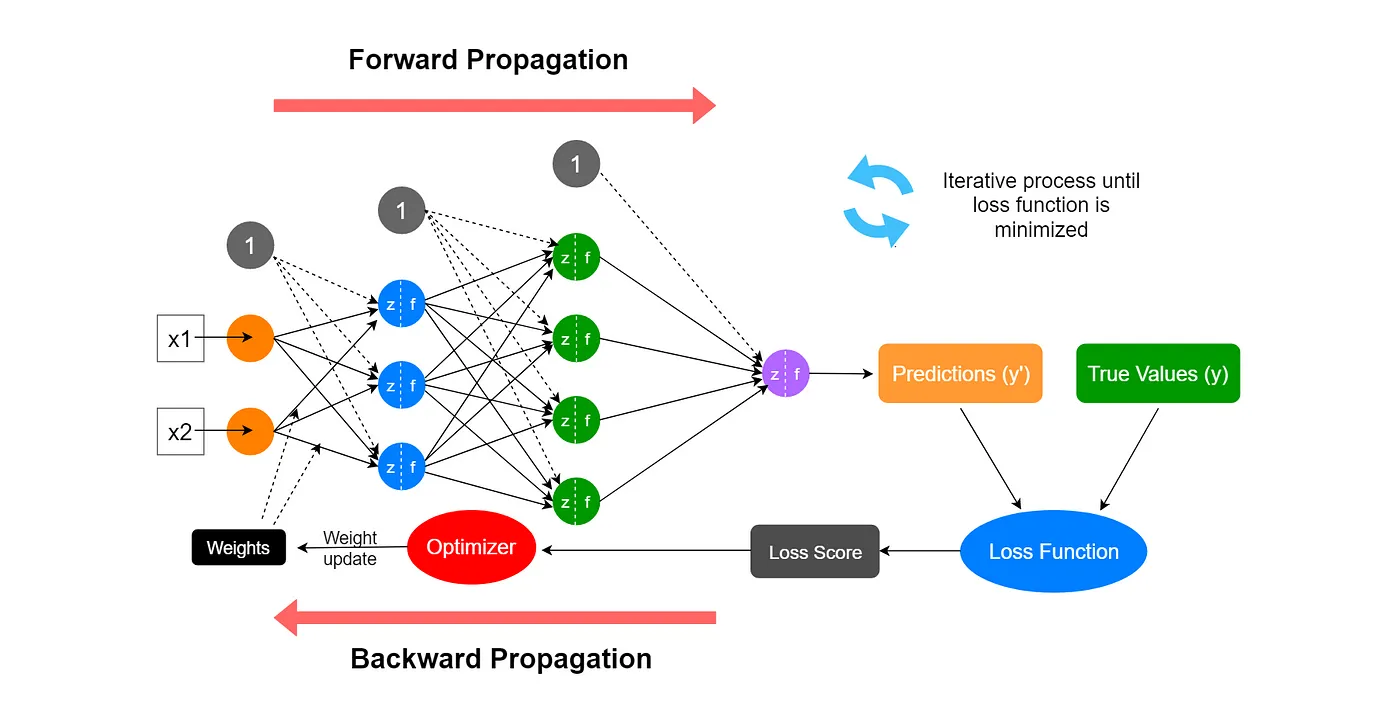

#🧠 Neural Network Structure:
Input layer: Features

Hidden layers: Neurons with activation (e.g., sigmoid, ReLU)

Output layer: Predictions

Weights & Biases: Learnable parameters

Loss function: Measures prediction error (e.g., MSE for regression)

#⚙️ Required Libraries

In [1]:
pip install numpy matplotlib


#🧪 Step-by-Step Python Code (from scratch)
🔹 Step 1: Import and Create Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


#🔹 Step 2: Define Activation and Derivative

In [3]:
# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


#🔹 Step 3: Initialize Weights

In [4]:
np.random.seed(42)

input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Random weights
w_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
w_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))


#🔹 Step 4: Train with Backpropagation

In [5]:
epochs = 10000
learning_rate = 0.1
errors = []

for _ in range(epochs):
    # Forward pass
    hidden_input = np.dot(X, w_input_hidden)
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, w_hidden_output)
    final_output = sigmoid(final_input)

    # Error
    error = y - final_output
    errors.append(np.mean(np.abs(error)))

    # Backward pass
    d_output = error * sigmoid_derivative(final_output)

    error_hidden = d_output.dot(w_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights
    w_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    w_input_hidden += X.T.dot(d_hidden) * learning_rate


#🔹 Step 5: Results & Plot


Final Output:
[[0.204]
 [0.736]
 [0.736]
 [0.344]]


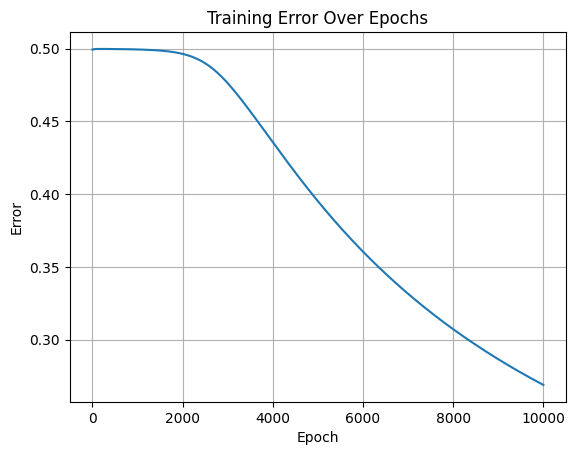

In [6]:
print("Final Output:")
print(np.round(final_output, 3))

# Plot training error
plt.plot(errors)
plt.title("Training Error Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid()
plt.show()


#✅ Summary
| Step             | What Happens                          |
| ---------------- | ------------------------------------- |
| Forward Pass     | Calculates prediction                 |
| Loss Calculation | Measures how wrong the prediction is  |
| Backward Pass    | Calculates gradients using chain rule |
| Weight Update    | Applies gradients via learning rate   |
